In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def birth_graph(data):

    # select the data for the five regions of interest
    regions = ['Asia (UN)', 'Africa (UN)', 'Europe (UN)', 'Latin America and the Caribbean (UN)', 'Northern America (UN)']
    df_filtered = data[data['Entity'].isin(regions)]

    # pivot the dataframe to have years as index and regions as columns
    df_pivot = df_filtered.pivot(index='Year', columns='Entity', values='Births - Sex: all - Age: all - Variant: estimates')
    df_regions = df_pivot[regions]

    # create a stacked area plot for the five regions
    fig, ax = plt.subplots()
    ax.stackplot(df_pivot.index, df_regions.values.T, labels=df_regions.columns)

    # scale values for million
    scale_y = 1e6
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)+" million")
    ax.yaxis.set_major_formatter(ticks_y)

    # arrange y axis values 0 to 140 million by step size 20 million 
    plt.yticks(np.arange(0, 140000001, 20000000))

    # add gridlines, grid line styles and color. Title of graph and make left,
    # right, top spines color gray  
    plt.grid(axis="y",linestyle = "dotted", color="white")
    ax.set_title('annual number of births by region', color="r")
    ax.spines["top"].set_color("gray")
    ax.spines["right"].set_color("gray")
    ax.spines["left"].set_color("gray")

    # add legend to the plot
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5))

    return plt.gca()

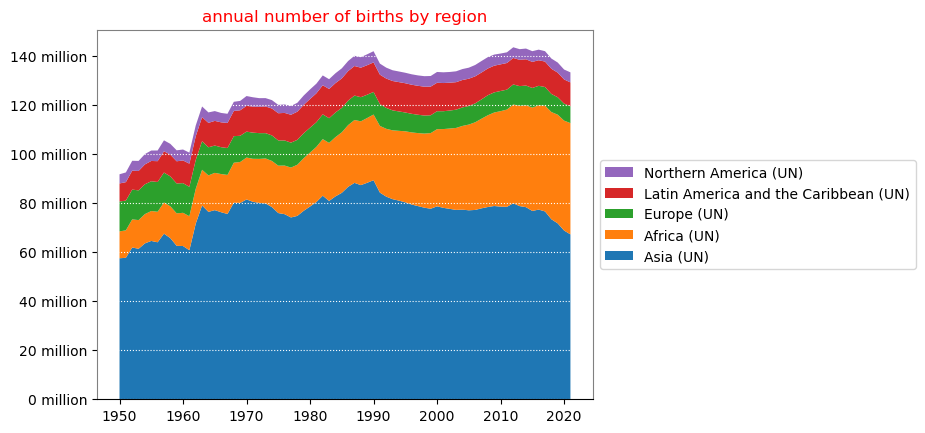

In [3]:
# import data from csv file
data = pd.read_csv(r"annual-number-of-births-by-world-region.csv")

#call function with imported data
graph = birth_graph(data)

# displays the plot
plt.show() 